In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier, plot_tree
from sklearn.decomposition import PCA

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score 
from sklearn import preprocessing
from sklearn.utils import class_weight

In [4]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

In [5]:
#data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
path = r"C:\Users\kssin\Downloads\WESAD\S17\S17.pkl"
#s2_path = data_set + 'S2/S2.pkl'

with open(path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

In [6]:
c_ax=data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=data['label']

print("Done")

Done


In [7]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")

data frame combined


In [8]:
display(df.shape)
display(df.info)
display(df.describe)

(4144000, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7002 -0.1982 -1.0702  1.431793  0.007095  5.400467  32.415283   
1        0.7294 -0.1902 -1.0470  1.461960 -0.012405  5.408859  32.434631   
2        0.7646 -0.1840 -1.0046  1.471619 -0.018082  5.401611  32.445099   
3        0.8014 -0.1778 -0.9782  1.472763 -0.027557  5.407715  32.439087   
4        0.8348 -0.1608 -0.8950  1.469421 -0.026779  5.410385  32.439087   
...         ...     ...     ...       ...       ...       ...        ...   
4143995  0.9006 -0.0400 -0.1898  0.173676 -0.005539  7.265091  33.862762   
4143996  0.9022 -0.0398 -0.1872  0.168777 -0.004944  7.266617  33.859741   
4143997  0.9028 -0.0424 -0.1864  0.167130 -0.016068  7.262802  33.864288   
4143998  0.9002 -0.0408 -0.1854  0.170334  0.005173  7.269669  33.862762   
4143999  0.8996 -0.0414 -0.1862  0.175232  0.022751  7.268143  33.868835   

           c_resp  w_label  
0        3.221130      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.7002 -0.1982 -1.0702  1.431793  0.007095  5.400467  32.415283   
1        0.7294 -0.1902 -1.0470  1.461960 -0.012405  5.408859  32.434631   
2        0.7646 -0.1840 -1.0046  1.471619 -0.018082  5.401611  32.445099   
3        0.8014 -0.1778 -0.9782  1.472763 -0.027557  5.407715  32.439087   
4        0.8348 -0.1608 -0.8950  1.469421 -0.026779  5.410385  32.439087   
...         ...     ...     ...       ...       ...       ...        ...   
4143995  0.9006 -0.0400 -0.1898  0.173676 -0.005539  7.265091  33.862762   
4143996  0.9022 -0.0398 -0.1872  0.168777 -0.004944  7.266617  33.859741   
4143997  0.9028 -0.0424 -0.1864  0.167130 -0.016068  7.262802  33.864288   
4143998  0.9002 -0.0408 -0.1854  0.170334  0.005173  7.269669  33.862762   
4143999  0.8996 -0.0414 -0.1862  0.175232  0.022751  7.268143  33.868835   

           c_resp  w_label  
0        3.221130      0

## Concatenate classes 0, 1, 2, 3, and 4
Classes 5, 6 and 7 correspond to timed periods in which the participant answered questionnaires, therefore, only classes 0, 1, 2, 3, and 4 will be used. Additionally, the significant imbalance has been eliminated¶

In [9]:
loc0 = df.loc[df['w_label'] == 0]
loc1 = df.loc[df['w_label'] == 1]
loc2 = df.loc[df['w_label'] == 2]
loc3 = df.loc[df['w_label'] == 3]
loc4 = df.loc[df['w_label'] == 4]

In [10]:
c_loc = pd.concat([loc0, loc1, loc2, loc3, loc4])
c_loc

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.7002,-0.1982,-1.0702,1.431793,0.007095,5.400467,32.415283,3.221130,0.0
1,0.7294,-0.1902,-1.0470,1.461960,-0.012405,5.408859,32.434631,3.607178,0.0
2,0.7646,-0.1840,-1.0046,1.471619,-0.018082,5.401611,32.445099,3.608704,0.0
3,0.8014,-0.1778,-0.9782,1.472763,-0.027557,5.407715,32.439087,3.643799,0.0
4,0.8348,-0.1608,-0.8950,1.469421,-0.026779,5.410385,32.439087,3.575134,0.0
...,...,...,...,...,...,...,...,...,...
3957259,0.4826,-0.0094,-0.8248,0.195236,0.013962,7.021713,34.080353,14.350891,4.0
3957260,0.4838,-0.0088,-0.8298,0.178574,0.013504,7.020569,34.084900,14.419556,4.0
3957261,0.4872,-0.0086,-0.8294,0.158020,0.024353,7.020569,34.022461,14.363098,4.0
3957262,0.4858,-0.0080,-0.8376,0.129959,0.004623,7.029724,34.063538,14.361572,4.0


In [11]:
c_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4022201.0,0.625521,0.232062,0.181000,0.385000,0.638400,0.875800,1.859400
c_ay,4022201.0,-0.016564,0.060754,-0.665600,-0.061000,-0.003800,0.028000,0.541600
c_az,4022201.0,-0.590528,0.315183,-1.321400,-0.886200,-0.691400,-0.280600,1.474400
c_ecg,4022201.0,0.000970,0.286113,-1.258484,-0.111282,-0.040237,0.017990,1.499954
c_emg,4022201.0,-0.004097,0.017965,-0.901337,-0.011765,-0.003891,0.003571,1.138412
c_eda,4022201.0,6.492656,0.811025,5.057526,5.739975,6.296158,7.221985,8.211136
c_temp,4022201.0,33.775670,0.425098,32.102783,33.533875,33.677673,34.103210,34.755402
c_resp,4022201.0,0.044936,4.788009,-28.024292,-2.362061,-0.218201,2.647400,28.684998
w_label,4022201.0,1.160285,1.407391,0.000000,0.000000,1.000000,2.000000,4.000000


#### Plot all classes vs. classes 0,1,2,3,4

4144000 4022201
Number of Rows Removed: 121799


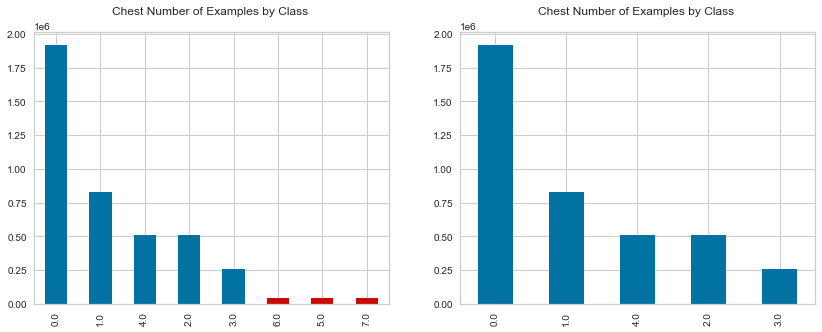

In [12]:
plt.figure(figsize = (14,5))
plt.subplot(1, 2, 1)
df['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n',
                                     color=['b','b','b','b','b','r','r','r'])
plt.subplot(1, 2, 2)
c_loc['w_label'].value_counts().plot(kind='bar', 
                                     title='Chest Number of Examples by Class \n')
print((df['w_label'].value_counts().sum()), c_loc['w_label'].value_counts().sum())
print('Number of Rows Removed:', (df['w_label'].value_counts().sum()) - 
      c_loc['w_label'].value_counts().sum());

# Calculating the interquartile range

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.491200
c_ay       0.086800
c_az       0.610000
c_ecg      0.128815
c_emg      0.015289
c_eda      1.486588
c_temp     0.576874
c_resp     5.038452
w_label    2.000000
dtype: float64


In [14]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(3200355, 9)


In [15]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [16]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
67568,0.500545,-3.033391,0.034541,-1.558969,-2.055950,-1.128988,-2.842626,0.437900,-0.177914
67955,0.138061,1.409412,-0.371879,0.160937,-0.730753,-1.105246,-2.854476,-0.957747,-0.177914
68120,0.392139,1.702591,0.140591,-0.430466,-0.822723,-1.082928,-2.925577,-0.671195,-0.177914
68172,0.394679,1.856699,0.016125,0.128994,-0.312710,-1.071057,-2.791195,-0.560285,-0.177914
68321,-0.537785,2.469371,-0.730037,-0.353803,-1.441426,-1.076755,-2.787325,-0.355297,-0.177914


In [17]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,3.200355e+06,3.200355e+06,3.200355e+06,3.200355e+06,3.200355e+06,3.200355e+06,3.200355e+06,3.200355e+06,3.200355e+06
mean,-1.480728e-14,-3.255689e-13,1.407498e-13,8.872057e-16,5.163102e-16,2.436659e-14,1.871976e-13,7.158626e-20,-1.447423e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.843744e+00,-3.292743e+00,-1.878173e+00,-2.519087e+00,-2.808427e+00,-1.732986e+00,-2.933396e+00,-2.838462e+00,-8.561589e-01
25%,-1.001901e+00,-8.646118e-01,-9.180057e-01,-5.774045e-01,-6.304228e-01,-8.958410e-01,-6.493032e-01,-6.483226e-01,-8.561589e-01
50%,4.489910e-02,2.291748e-01,-3.274268e-01,6.693272e-02,1.336355e-02,-2.529062e-01,-2.934767e-01,-8.816482e-02,-1.779142e-01
75%,1.091699e+00,7.854643e-01,9.934378e-01,5.574869e-01,6.320673e-01,9.384699e-01,7.819834e-01,6.554036e-01,5.003306e-01
max,4.172813e+00,3.228630e+00,3.905055e+00,2.617358e+00,2.776628e+00,2.189676e+00,2.589411e+00,2.861510e+00,2.535065e+00


In [18]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200355 entries, 67568 to 4143999
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 244.2 MB


In [19]:
norm_df_out.shape

(3200355, 9)

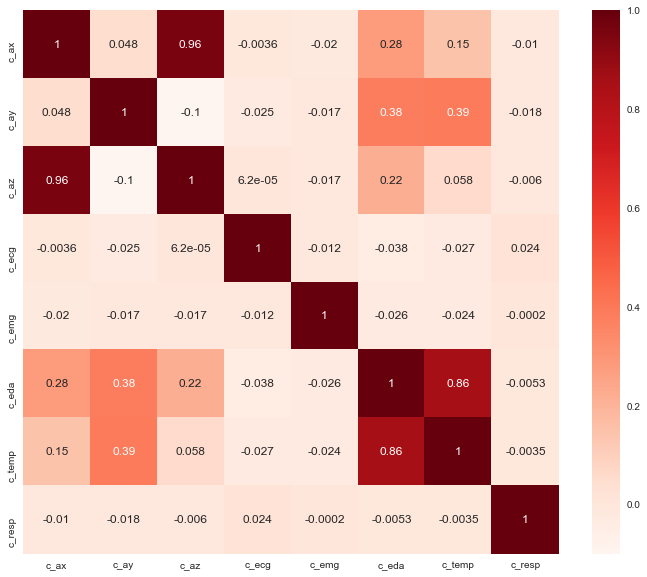

In [20]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     3.147380e-24
c_emg     2.274050e-02
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    6.225241e-25
dtype: float64

In [22]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3155518,1.157759,-0.086557,1.572586,-0.415408,1.869475,1.418534,1.418989,1.954814
2025806,-1.051022,0.762913,-0.932611,-0.992664,0.841089,-0.266202,-0.385537,0.168179
4035330,1.283104,-0.887163,1.765636,-0.191350,1.702258,0.938470,0.392058,-1.107497
1124621,0.878273,0.529872,0.562887,-0.367493,0.138776,-0.863077,-0.077272,-0.049325
2181851,1.244145,-0.699228,1.502733,-0.272120,0.665511,-0.180730,-0.309519,-1.447993
...,...,...,...,...,...,...,...,...
2227715,1.211962,-0.755609,1.446850,-0.012469,-0.220741,0.307406,-0.249462,2.006169
3005305,1.235676,-0.018900,1.537025,0.531476,0.866171,1.344459,1.205041,-0.704425
3514270,-0.868086,0.988435,-0.865298,-0.170359,0.046807,1.026316,0.866627,0.005483
103000,-0.983268,-1.341969,-0.863393,0.142227,1.539221,-1.370682,-2.359914,0.042165


In [23]:
norm_y_train

3155518    0.0
2025806    0.0
4035330    0.0
1124621    0.0
2181851    0.0
          ... 
2227715    0.0
3005305    0.0
3514270    0.0
103000     1.0
2582495    2.0
Name: w_label, Length: 2560284, dtype: float64

In [24]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3827122,-0.651273,0.627599,-0.792269,-0.205952,0.782563,0.859171,0.367954,-1.708220
1755981,0.974823,1.559761,0.724820,-0.265275,-2.620308,-0.306088,-0.825040,0.637710
1828112,-0.957860,0.777948,-0.898955,0.508660,0.632067,-0.379689,-0.633422,0.335622
1206989,1.181473,0.063792,1.166801,-1.407924,0.055168,-0.892042,-0.473486,-1.270624
3317301,-0.539479,-1.447212,-0.716066,-1.965559,-0.454845,1.171617,1.984974,-1.114401
...,...,...,...,...,...,...,...,...
90125,-0.941768,-1.311898,-0.904035,-2.033096,0.581902,-1.300406,-2.585551,-0.595673
3785302,-1.032390,0.574977,-0.916101,1.009709,-1.917996,0.828782,0.392058,-0.600852
2622989,0.381975,0.623839,-0.025152,-0.110123,-1.800944,1.007322,1.382632,0.114666
1951236,-1.059491,0.905745,-0.948487,-0.541354,-0.195658,-0.336478,-0.341522,0.273478


In [25]:
norm_y_test

3827122    4.0
1755981    0.0
1828112    4.0
1206989    0.0
3317301    0.0
          ... 
90125      1.0
3785302    4.0
2622989    2.0
1951236    4.0
1508800    0.0
Name: w_label, Length: 640071, dtype: float64

In [26]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_test.shape)
y

(2560284, 8)
(640071,)


67568      1.0
67955      1.0
68120      1.0
68172      1.0
68321      1.0
          ... 
4143995    0.0
4143996    0.0
4143997    0.0
4143998    0.0
4143999    0.0
Name: w_label, Length: 3200355, dtype: float64

In [27]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3993980,0.9130,-0.0572,-0.0690,-0.027374,0.016800,7.191849,33.984406,0.378418
1150395,0.8190,0.0126,-0.4318,-0.019684,-0.015930,5.716324,33.759552,-1.205444
3011440,0.9096,-0.0242,-0.0962,0.007874,0.001465,7.548523,34.284790,-7.884216
3476550,0.4290,0.0414,-0.8558,0.187317,0.010208,7.539368,34.182465,0.938416
3644006,0.3446,0.0142,-0.9076,0.068069,-0.005493,6.872940,34.135193,-8.363342
...,...,...,...,...,...,...,...,...
3100307,0.9088,-0.0134,-0.1288,-0.045822,0.007141,7.563782,34.402527,0.230408
437963,0.3514,-0.0728,-0.9010,-0.024399,-0.025818,5.380630,33.234985,3.352356
2485604,0.6984,0.0358,-0.6166,-0.226868,0.002792,7.127762,33.960052,-0.782776
1582556,0.8846,-0.0206,-0.2514,-0.083084,0.009109,6.262589,33.608002,-2.046204


In [28]:
(y_train)

3993980    0.0
1150395    0.0
3011440    0.0
3476550    0.0
3644006    0.0
          ... 
3100307    0.0
437963     1.0
2485604    2.0
1582556    0.0
3123338    0.0
Name: w_label, Length: 2560284, dtype: float64

In [29]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
247281,0.3686,-0.0630,-0.8954,-0.023346,-0.001190,5.276108,33.194336,-1.051331
460085,0.3524,-0.0698,-0.9102,-0.075119,-0.012177,5.395126,33.319397,-0.799561
855155,0.3894,0.0030,-0.8892,-0.046555,0.007919,5.558395,33.576233,-0.765991
3020893,0.9208,-0.0102,-0.1218,0.048660,0.024582,7.621765,34.307709,4.576111
2065327,0.3770,0.0302,-0.8954,0.015427,-0.000870,6.283569,33.629181,0.137329
...,...,...,...,...,...,...,...,...
2831907,0.6242,0.0654,-0.7084,-0.111603,-0.001968,7.273865,34.322998,0.177002
4007412,0.9136,-0.0710,-0.0276,-0.029434,-0.007736,7.237625,33.917480,1.513672
4021919,0.9126,-0.0642,-0.0616,-0.023163,-0.009064,7.201767,33.923553,-3.578186
95770,0.3860,-0.0796,-0.8860,-0.016022,-0.012268,5.374146,32.818787,-3.367615


In [30]:
(y_test)

247281     1.0
460085     1.0
855155     1.0
3020893    0.0
2065327    0.0
          ... 
2831907    2.0
4007412    0.0
4021919    0.0
95770      1.0
3473322    0.0
Name: w_label, Length: 640071, dtype: float64

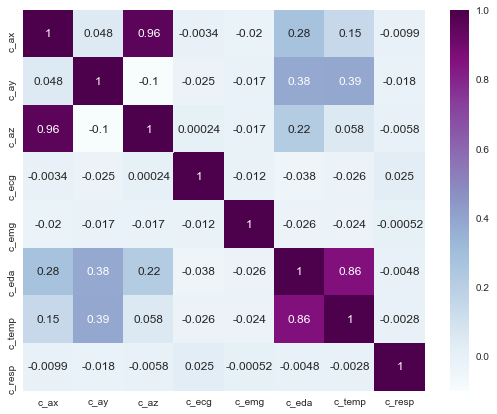

In [31]:
plt.figure(figsize=(9,7))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.BuPu);

# XGBoost 
(colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)

In [32]:
evalSet = [(x_train, y_train), (x_test, y_test)] 

In [33]:
xg_class = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

xg_allChest = xg_class.fit(x_train,y_train, 
                              eval_metric='merror', 
                              eval_set = evalSet) 

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[23:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[23:47:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 552 extra nodes, 142 pruned nodes, max_depth=10
[23:47:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 300 extra nodes, 160 pruned nodes, max_depth=10
[23:47:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 220 extra nodes, 112 pruned nodes, max_depth=10
[23:47:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost

[23:47:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 318 extra nodes, 96 pruned nodes, max_depth=10
[23:47:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 54 pruned nodes, max_depth=10
[5]	validation_0-merror:0.05408	validation_1-merror:0.05466
[23:47:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 566 extra nodes, 88 pruned nodes, max_depth=10
[23:47:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 74 pruned nodes, max_depth=10
[23:47:46] INFO: C:/buildkite-age

[23:48:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 138 pruned nodes, max_depth=10
[23:48:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 188 pruned nodes, max_depth=10
[23:48:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 96 pruned nodes, max_depth=10
[11]	validation_0-merror:0.04285	validation_1-merror:0.04328
[23:48:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 440 extra nodes, 322 pruned nodes, max_depth=10
[23:48:23] INFO: C:/buildkit

[23:48:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 44 pruned nodes, max_depth=10
[23:48:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 38 pruned nodes, max_depth=10
[23:48:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 388 extra nodes, 244 pruned nodes, max_depth=10
[23:48:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 120 pruned nodes, max_depth=10
[17]	validation_0-merror:0.03586	validation_1-merror:0.03623
[23:48:59] INFO: C:/buildkite-

[23:49:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 42 pruned nodes, max_depth=8
[23:49:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 318 pruned nodes, max_depth=9
[23:49:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 106 pruned nodes, max_depth=10
[23:49:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 248 extra nodes, 152 pruned nodes, max_depth=10
[23:49:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e

[28]	validation_0-merror:0.03014	validation_1-merror:0.03059
[23:50:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 496 extra nodes, 200 pruned nodes, max_depth=10
[23:50:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 20 pruned nodes, max_depth=10
[23:50:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 136 pruned nodes, max_depth=10
[23:50:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 76 pruned nodes, max_depth=10
[23:50:11] INFO: C:/buildkite-

[23:50:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 74 pruned nodes, max_depth=10
[34]	validation_0-merror:0.02560	validation_1-merror:0.02589
[23:50:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 170 pruned nodes, max_depth=10
[23:50:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 90 pruned nodes, max_depth=10
[23:50:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 122 pruned nodes, max_depth=10
[23:50:47] INFO: C:/buildkite-a

[23:51:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 196 extra nodes, 100 pruned nodes, max_depth=10
[23:51:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 24 pruned nodes, max_depth=6
[40]	validation_0-merror:0.02257	validation_1-merror:0.02278
[23:51:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 362 pruned nodes, max_depth=10
[23:51:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 276 pruned nodes, max_depth=10
[23:51:23] INFO: C:/buildkite-

[23:51:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 96 pruned nodes, max_depth=10
[23:51:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 218 extra nodes, 192 pruned nodes, max_depth=10
[23:51:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 96 pruned nodes, max_depth=10
[46]	validation_0-merror:0.02091	validation_1-merror:0.02117
[23:51:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 502 extra nodes, 270 pruned nodes, max_depth=10
[23:51:59] INFO: C:/buildkite-

[23:52:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 150 pruned nodes, max_depth=9
[23:52:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 126 pruned nodes, max_depth=7
[23:52:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 430 pruned nodes, max_depth=10
[23:52:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 48 pruned nodes, max_depth=6
[52]	validation_0-merror:0.02035	validation_1-merror:0.02063
[23:52:35] INFO: C:/buildkite-agen

[23:53:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 50 pruned nodes, max_depth=10
[23:53:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 212 pruned nodes, max_depth=10
[23:53:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 96 pruned nodes, max_depth=10
[23:53:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 128 pruned nodes, max_depth=10
[23:53:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03022

[23:53:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 348 pruned nodes, max_depth=10
[23:53:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 54 pruned nodes, max_depth=8
[23:53:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 242 pruned nodes, max_depth=9
[23:53:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 284 pruned nodes, max_depth=10
[23:53:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[23:54:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 54 pruned nodes, max_depth=7
[69]	validation_0-merror:0.01704	validation_1-merror:0.01746
[23:54:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 254 pruned nodes, max_depth=10
[23:54:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 96 pruned nodes, max_depth=10
[23:54:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 56 pruned nodes, max_depth=10
[23:54:22] INFO: C:/buildkite-agen

[23:54:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 260 pruned nodes, max_depth=10
[23:54:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 52 pruned nodes, max_depth=10
[75]	validation_0-merror:0.01591	validation_1-merror:0.01633
[23:54:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 294 extra nodes, 150 pruned nodes, max_depth=10
[23:55:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 112 pruned nodes, max_depth=4
[23:55:04] INFO: C:/buildkite-a

[23:55:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 142 pruned nodes, max_depth=10
[23:55:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 162 pruned nodes, max_depth=10
[23:55:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 74 pruned nodes, max_depth=9
[81]	validation_0-merror:0.01466	validation_1-merror:0.01508
[23:55:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 298 extra nodes, 236 pruned nodes, max_depth=10
[23:55:45] INFO: C:/buildkite-a

[23:56:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 102 pruned nodes, max_depth=7
[23:56:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 68 pruned nodes, max_depth=10
[23:56:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 212 extra nodes, 248 pruned nodes, max_depth=10
[23:56:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 84 pruned nodes, max_depth=7
[87]	validation_0-merror:0.01404	validation_1-merror:0.01446
[23:56:23] INFO: C:/buildkite-age

[23:56:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 124 pruned nodes, max_depth=5
[23:56:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 106 pruned nodes, max_depth=6
[23:56:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 268 pruned nodes, max_depth=3
[23:56:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 122 pruned nodes, max_depth=10
[23:56:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[23:57:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 420 pruned nodes, max_depth=8
[23:57:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 64 pruned nodes, max_depth=10
[23:57:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 116 pruned nodes, max_depth=7
[23:57:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 82 pruned nodes, max_depth=10
[23:57:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[23:58:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 118 pruned nodes, max_depth=10
[104]	validation_0-merror:0.01257	validation_1-merror:0.01296
[23:58:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 470 pruned nodes, max_depth=10
[23:58:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 58 pruned nodes, max_depth=8
[23:58:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 70 pruned nodes, max_depth=5
[23:58:11] INFO: C:/buildkite-age

[23:58:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 176 extra nodes, 192 pruned nodes, max_depth=10
[23:58:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 58 pruned nodes, max_depth=8
[110]	validation_0-merror:0.01214	validation_1-merror:0.01259
[23:58:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 246 extra nodes, 206 pruned nodes, max_depth=10
[23:58:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 80 pruned nodes, max_depth=5
[23:58:47] INFO: C:/buildkite-ag

[23:59:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 52 pruned nodes, max_depth=10
[23:59:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 212 pruned nodes, max_depth=10
[23:59:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 60 pruned nodes, max_depth=7
[116]	validation_0-merror:0.01176	validation_1-merror:0.01225
[23:59:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 244 extra nodes, 180 pruned nodes, max_depth=10
[23:59:25] INFO: C:/buildkite-a

[23:59:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 172 pruned nodes, max_depth=10
[23:59:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 118 pruned nodes, max_depth=8
[23:59:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 120 pruned nodes, max_depth=10
[00:00:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 94 pruned nodes, max_depth=7
[122]	validation_0-merror:0.01138	validation_1-merror:0.01184
[00:00:02] INFO: C:/buildkite-ag

[00:00:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 128 pruned nodes, max_depth=10
[00:00:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 112 pruned nodes, max_depth=7
[00:00:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 120 pruned nodes, max_depth=10
[00:00:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 188 pruned nodes, max_depth=7
[00:00:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[00:01:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 126 pruned nodes, max_depth=10
[00:01:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 80 pruned nodes, max_depth=9
[00:01:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 66 pruned nodes, max_depth=10
[00:01:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 150 pruned nodes, max_depth=10
[00:01:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e3

[00:01:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 148 pruned nodes, max_depth=9
[139]	validation_0-merror:0.01045	validation_1-merror:0.01093
[00:01:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 246 extra nodes, 424 pruned nodes, max_depth=10
[00:01:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 70 pruned nodes, max_depth=10
[00:01:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 64 pruned nodes, max_depth=3
[00:01:51] INFO: C:/buildkite-agen

[00:02:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 164 pruned nodes, max_depth=10
[00:02:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 158 pruned nodes, max_depth=10
[145]	validation_0-merror:0.01020	validation_1-merror:0.01069
[00:02:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 112 pruned nodes, max_depth=10
[00:02:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 142 pruned nodes, max_depth=8
[00:02:27] INFO: C:/buildkite

[00:02:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 124 pruned nodes, max_depth=10
[00:03:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 338 pruned nodes, max_depth=10
[00:03:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 124 pruned nodes, max_depth=10
[151]	validation_0-merror:0.00994	validation_1-merror:0.01045
[00:03:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 376 pruned nodes, max_depth=10
[00:03:04] INFO: C:/buildki

[00:03:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 104 pruned nodes, max_depth=9
[00:03:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 134 pruned nodes, max_depth=10
[00:03:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 192 extra nodes, 126 pruned nodes, max_depth=10
[00:03:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 82 pruned nodes, max_depth=4
[157]	validation_0-merror:0.00967	validation_1-merror:0.01021
[00:03:41] INFO: C:/buildkite-age

[00:04:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 40 pruned nodes, max_depth=10
[00:04:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 74 pruned nodes, max_depth=1
[00:04:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 408 pruned nodes, max_depth=10
[00:04:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 234 pruned nodes, max_depth=10
[00:04:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e

[00:04:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 394 pruned nodes, max_depth=10
[00:04:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 104 pruned nodes, max_depth=0
[00:04:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 74 pruned nodes, max_depth=10
[00:04:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 114 pruned nodes, max_depth=10
[00:04:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36

[00:05:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 100 pruned nodes, max_depth=10
[174]	validation_0-merror:0.00909	validation_1-merror:0.00973
[00:05:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 426 pruned nodes, max_depth=4
[00:05:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 106 pruned nodes, max_depth=0
[00:05:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 78 pruned nodes, max_depth=0
[00:05:29] INFO: C:/buildkite-agent/

[00:06:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 172 pruned nodes, max_depth=10
[00:06:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 72 pruned nodes, max_depth=4
[180]	validation_0-merror:0.00895	validation_1-merror:0.00963
[00:06:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 218 pruned nodes, max_depth=4
[00:06:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 104 pruned nodes, max_depth=7
[00:06:05] INFO: C:/buildkite-agent

[00:06:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 176 pruned nodes, max_depth=10
[00:06:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 306 pruned nodes, max_depth=10
[00:06:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 64 pruned nodes, max_depth=9
[186]	validation_0-merror:0.00878	validation_1-merror:0.00941
[00:06:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 340 pruned nodes, max_depth=6
[00:06:41] INFO: C:/buildkite-a

[00:07:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 78 pruned nodes, max_depth=6
[00:07:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 164 pruned nodes, max_depth=10
[00:07:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 208 pruned nodes, max_depth=10
[00:07:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 138 pruned nodes, max_depth=6
[192]	validation_0-merror:0.00858	validation_1-merror:0.00919
[00:07:26] INFO: C:/buildkite-age

[00:07:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 78 pruned nodes, max_depth=3
[00:07:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 76 pruned nodes, max_depth=5
[00:08:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 108 pruned nodes, max_depth=10
[00:08:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 252 pruned nodes, max_depth=5
[00:08:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a4

[203]	validation_0-merror:0.00835	validation_1-merror:0.00899
[00:08:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 340 pruned nodes, max_depth=10
[00:08:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 54 pruned nodes, max_depth=6
[00:08:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 126 pruned nodes, max_depth=1
[00:08:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 286 pruned nodes, max_depth=7
[00:08:39] INFO: C:/buildkite-agen

[00:09:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 110 pruned nodes, max_depth=7
[209]	validation_0-merror:0.00817	validation_1-merror:0.00884
[00:09:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 524 pruned nodes, max_depth=10
[00:09:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 80 pruned nodes, max_depth=1
[00:09:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 56 pruned nodes, max_depth=3
[00:09:16] INFO: C:/buildkite-agent/

[00:09:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 270 pruned nodes, max_depth=8
[00:09:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 110 pruned nodes, max_depth=7
[215]	validation_0-merror:0.00804	validation_1-merror:0.00869
[00:09:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 376 pruned nodes, max_depth=3
[00:09:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 44 pruned nodes, max_depth=5
[00:09:52] INFO: C:/buildkite-agent/

[00:10:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 134 pruned nodes, max_depth=10
[00:10:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 136 pruned nodes, max_depth=10
[00:10:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 128 pruned nodes, max_depth=7
[221]	validation_0-merror:0.00794	validation_1-merror:0.00861
[00:10:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 108 pruned nodes, max_depth=10
[00:10:28] INFO: C:/buildkite

[00:11:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 78 pruned nodes, max_depth=7
[00:11:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 122 pruned nodes, max_depth=10
[00:11:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 242 pruned nodes, max_depth=10
[00:11:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 118 pruned nodes, max_depth=3
[227]	validation_0-merror:0.00784	validation_1-merror:0.00847
[00:11:04] INFO: C:/buildkite-ag

[00:11:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 112 pruned nodes, max_depth=6
[00:11:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 52 pruned nodes, max_depth=1
[00:11:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 64 pruned nodes, max_depth=10
[00:11:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 214 pruned nodes, max_depth=8
[00:11:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a4

[00:12:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 156 pruned nodes, max_depth=10
[00:12:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 60 pruned nodes, max_depth=7
[00:12:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 102 pruned nodes, max_depth=6
[00:12:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 88 pruned nodes, max_depth=10
[00:12:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[00:12:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 118 pruned nodes, max_depth=6
[244]	validation_0-merror:0.00759	validation_1-merror:0.00823
[00:12:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 242 pruned nodes, max_depth=5
[00:12:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 94 pruned nodes, max_depth=6
[00:12:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 60 pruned nodes, max_depth=1
[00:12:52] INFO: C:/buildkite-agent/b

[00:13:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 256 pruned nodes, max_depth=9
[00:13:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 108 pruned nodes, max_depth=0
[250]	validation_0-merror:0.00749	validation_1-merror:0.00815
[00:13:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 434 pruned nodes, max_depth=10
[00:13:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 34 pruned nodes, max_depth=7
[00:13:29] INFO: C:/buildkite-agen

[00:14:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 252 pruned nodes, max_depth=10
[00:14:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 270 pruned nodes, max_depth=9
[00:14:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 108 pruned nodes, max_depth=2
[256]	validation_0-merror:0.00743	validation_1-merror:0.00810
[00:14:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 376 pruned nodes, max_depth=3
[00:14:05] INFO: C:/buildkite-agen

[00:14:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 66 pruned nodes, max_depth=1
[00:14:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 264 pruned nodes, max_depth=10
[00:14:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 254 pruned nodes, max_depth=10
[00:14:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 92 pruned nodes, max_depth=10
[262]	validation_0-merror:0.00732	validation_1-merror:0.00800
[00:14:42] INFO: C:/buildkite-age

[00:15:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 42 pruned nodes, max_depth=8
[00:15:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 58 pruned nodes, max_depth=2
[00:15:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 140 pruned nodes, max_depth=10
[00:15:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 274 pruned nodes, max_depth=10
[00:15:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1

[00:15:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 322 pruned nodes, max_depth=0
[00:15:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 100 pruned nodes, max_depth=0
[00:15:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 50 pruned nodes, max_depth=5
[00:15:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 264 pruned nodes, max_depth=0
[00:15:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46b

[00:16:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 104 pruned nodes, max_depth=2
[279]	validation_0-merror:0.00717	validation_1-merror:0.00786
[00:16:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 210 pruned nodes, max_depth=10
[00:16:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 84 pruned nodes, max_depth=8
[00:16:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 54 pruned nodes, max_depth=4
[00:16:32] INFO: C:/buildkite-agent/

[00:17:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 326 pruned nodes, max_depth=8
[00:17:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 94 pruned nodes, max_depth=10
[285]	validation_0-merror:0.00713	validation_1-merror:0.00782
[00:17:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 314 pruned nodes, max_depth=10
[00:17:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 78 pruned nodes, max_depth=0
[00:17:08] INFO: C:/buildkite-agent

[00:17:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 152 pruned nodes, max_depth=8
[00:17:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 192 pruned nodes, max_depth=1
[00:17:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 128 pruned nodes, max_depth=6
[291]	validation_0-merror:0.00704	validation_1-merror:0.00776
[00:17:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 384 pruned nodes, max_depth=8
[00:17:43] INFO: C:/buildkite-agent

[00:18:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 76 pruned nodes, max_depth=7
[00:18:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 306 pruned nodes, max_depth=0
[00:18:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 148 pruned nodes, max_depth=1
[00:18:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 152 pruned nodes, max_depth=0
[297]	validation_0-merror:0.00701	validation_1-merror:0.00774
[00:18:19] INFO: C:/buildkite-agent/bu

In [34]:
xg_class_pred = xg_class.predict(x_test)
xg_class_report = (classification_report(y_test,
                                         xg_class_pred,
                                         labels=np.unique(xg_class_pred),
                                         digits=4))

print('----------------------------------------')
print('Balanced Accuracy: {0:.4f}'.format(balanced_accuracy_score(y_test, xg_class_pred)))
print('----------------------------------------')
print('------------Classification Report------------')
print(xg_class_report)

----------------------------------------
Balanced Accuracy: 0.9882
----------------------------------------
------------Classification Report------------
              precision    recall  f1-score   support

           0     0.9943    0.9885    0.9914    286132
           1     0.9983    0.9991    0.9987    139581
           2     0.9985    0.9993    0.9989     73985
           3     0.9722    0.9881    0.9801     47675
           4     0.9849    0.9929    0.9889     85481
           5     0.9594    0.9615    0.9604      7217

    accuracy                         0.9923    640071
   macro avg     0.9846    0.9882    0.9864    640071
weighted avg     0.9923    0.9923    0.9923    640071



# QDA + Normalization + Cross Validation = 10

In [35]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8833    0.7893    0.8337   1433013
         1.0     0.9889    0.9260    0.9564    695083
         2.0     0.9675    0.9465    0.9569    371501
         3.0     0.8625    0.9291    0.8945    237371
         4.0     0.6080    0.8558    0.7109    427275
         5.0     0.7288    0.9759    0.8344     36112

    accuracy                         0.8586   3200355
   macro avg     0.8398    0.9038    0.8645   3200355
weighted avg     0.8760    0.8586    0.8628   3200355



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9201    0.8469    0.8820   1433013
         1.0     0.9885    0.9579    0.9730    695083
         2.0     0.9492    0.9716    0.9603    371501
         3.0     0.7715    0.9197    0.8391    237371
         4.0     0.7921    0.9044    0.8445    427275
         5.0     0.4975    0.7816    0.6080     36112

    accuracy                         0.8978   3200355
   macro avg     0.8198    0.8970    0.8511   3200355
weighted avg     0.9055    0.8978    0.8996   3200355



# Individual and Combined Features 
Model shortChest: Less Electromyogram and Model ACC TEMP EDA

### Model shortChest: Less Electromyogram

#### XGBoost 

In [37]:
ch_short = c_loc[['c_ax', 'c_ay', 'c_az', 'c_eda', 'c_temp', 'c_resp', 'c_ecg', 'w_label']]
y = ch_short.w_label
x = ch_short.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 
print(x_train.shape)
print(y_test.shape)

(3217760, 7)
(804441,)


In [38]:
shortChest = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2) 

model_shortChest = shortChest.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[00:26:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[00:26:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 610 extra nodes, 182 pruned nodes, max_depth=10
[00:26:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 104 pruned nodes, max_depth=10
[00:26:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 264 extra nodes, 90 pruned nodes, max_depth=10
[00:26:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/

[00:27:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 662 extra nodes, 248 pruned nodes, max_depth=10
[6]	validation_0-merror:0.03461	validation_1-merror:0.03500
[00:27:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 876 extra nodes, 244 pruned nodes, max_depth=10
[00:27:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 314 extra nodes, 172 pruned nodes, max_depth=10
[00:27:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 314 extra nodes, 256 pruned nodes, max_depth=10
[00:27:48] INFO: C:/buildkit

[00:28:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 354 extra nodes, 58 pruned nodes, max_depth=10
[13]	validation_0-merror:0.03203	validation_1-merror:0.03235
[00:28:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 336 extra nodes, 124 pruned nodes, max_depth=10
[00:28:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 64 pruned nodes, max_depth=10
[00:28:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 54 pruned nodes, max_depth=10
[00:28:36] INFO: C:/buildkite-

[00:29:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 442 extra nodes, 98 pruned nodes, max_depth=10
[20]	validation_0-merror:0.02770	validation_1-merror:0.02793
[00:29:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 372 extra nodes, 464 pruned nodes, max_depth=10
[00:29:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 84 pruned nodes, max_depth=10
[00:29:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 114 pruned nodes, max_depth=10
[00:29:34] INFO: C:/buildkite

[00:30:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 332 extra nodes, 180 pruned nodes, max_depth=10
[27]	validation_0-merror:0.02355	validation_1-merror:0.02377
[00:30:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 370 extra nodes, 158 pruned nodes, max_depth=10
[00:30:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 338 extra nodes, 270 pruned nodes, max_depth=10
[00:30:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 256 pruned nodes, max_depth=10
[00:30:22] INFO: C:/buildki

[00:31:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 214 pruned nodes, max_depth=10
[34]	validation_0-merror:0.02072	validation_1-merror:0.02105
[00:31:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 274 extra nodes, 448 pruned nodes, max_depth=10
[00:31:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 108 pruned nodes, max_depth=10
[00:31:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 140 pruned nodes, max_depth=10
[00:31:19] INFO: C:/buildkit

[00:32:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 122 pruned nodes, max_depth=10
[41]	validation_0-merror:0.01779	validation_1-merror:0.01821
[00:32:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 272 pruned nodes, max_depth=10
[00:32:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 198 pruned nodes, max_depth=10
[00:32:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 128 extra nodes, 240 pruned nodes, max_depth=10
[00:32:09] INFO: C:/buildki

[00:33:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 260 pruned nodes, max_depth=10
[48]	validation_0-merror:0.01671	validation_1-merror:0.01709
[00:33:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 330 extra nodes, 122 pruned nodes, max_depth=10
[00:33:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 100 pruned nodes, max_depth=10
[00:33:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 122 pruned nodes, max_depth=10
[00:33:05] INFO: C:/buildkit

[00:33:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 190 pruned nodes, max_depth=10
[55]	validation_0-merror:0.01476	validation_1-merror:0.01527
[00:33:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 350 extra nodes, 156 pruned nodes, max_depth=10
[00:33:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 100 pruned nodes, max_depth=9
[00:33:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 88 pruned nodes, max_depth=10
[00:33:54] INFO: C:/buildkite-a

[00:34:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 32 pruned nodes, max_depth=10
[62]	validation_0-merror:0.01365	validation_1-merror:0.01417
[00:34:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 384 extra nodes, 294 pruned nodes, max_depth=10
[00:34:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 88 pruned nodes, max_depth=10
[00:34:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 110 pruned nodes, max_depth=10
[00:34:50] INFO: C:/buildkite-

[00:35:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 304 pruned nodes, max_depth=10
[69]	validation_0-merror:0.01290	validation_1-merror:0.01345
[00:35:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 618 pruned nodes, max_depth=10
[00:35:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 140 extra nodes, 188 pruned nodes, max_depth=10
[00:35:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 146 pruned nodes, max_depth=10
[00:35:47] INFO: C:/buildkit

[00:36:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 208 pruned nodes, max_depth=10
[76]	validation_0-merror:0.01229	validation_1-merror:0.01282
[00:36:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 184 pruned nodes, max_depth=10
[00:36:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 84 pruned nodes, max_depth=10
[00:36:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 72 pruned nodes, max_depth=10
[00:36:39] INFO: C:/buildkite-ag

[00:37:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 196 extra nodes, 224 pruned nodes, max_depth=10
[83]	validation_0-merror:0.01140	validation_1-merror:0.01203
[00:37:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 298 extra nodes, 216 pruned nodes, max_depth=10
[00:37:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 116 pruned nodes, max_depth=9
[00:37:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 78 pruned nodes, max_depth=10
[00:37:31] INFO: C:/buildkite-a

[00:38:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 142 pruned nodes, max_depth=10
[90]	validation_0-merror:0.01080	validation_1-merror:0.01143
[00:38:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 374 extra nodes, 298 pruned nodes, max_depth=10
[00:38:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 234 pruned nodes, max_depth=10
[00:38:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 102 pruned nodes, max_depth=10
[00:38:21] INFO: C:/buildkite

[00:39:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 52 pruned nodes, max_depth=10
[97]	validation_0-merror:0.01025	validation_1-merror:0.01091
[00:39:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 268 pruned nodes, max_depth=10
[00:39:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 160 pruned nodes, max_depth=8
[00:39:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 98 pruned nodes, max_depth=10
[00:39:28] INFO: C:/buildkite-a

[00:40:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 246 pruned nodes, max_depth=10
[104]	validation_0-merror:0.00996	validation_1-merror:0.01061
[00:40:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 314 extra nodes, 220 pruned nodes, max_depth=10
[00:40:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 106 pruned nodes, max_depth=10
[00:40:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 154 pruned nodes, max_depth=6
[00:40:20] INFO: C:/buildkite-

[00:41:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 152 extra nodes, 214 pruned nodes, max_depth=10
[111]	validation_0-merror:0.00958	validation_1-merror:0.01022
[00:41:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 256 extra nodes, 360 pruned nodes, max_depth=10
[00:41:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 48 pruned nodes, max_depth=10
[00:41:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 56 pruned nodes, max_depth=10
[00:41:13] INFO: C:/buildkite

[00:42:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 190 pruned nodes, max_depth=10
[118]	validation_0-merror:0.00904	validation_1-merror:0.00971
[00:42:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 586 pruned nodes, max_depth=10
[00:42:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 190 pruned nodes, max_depth=5
[00:42:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 108 pruned nodes, max_depth=10
[00:42:09] INFO: C:/buildkite

[00:42:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 262 pruned nodes, max_depth=10
[125]	validation_0-merror:0.00881	validation_1-merror:0.00950
[00:42:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 286 extra nodes, 190 pruned nodes, max_depth=10
[00:42:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 40 pruned nodes, max_depth=10
[00:42:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 106 pruned nodes, max_depth=8
[00:42:58] INFO: C:/buildkite-a

[00:43:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 76 extra nodes, 276 pruned nodes, max_depth=10
[132]	validation_0-merror:0.00846	validation_1-merror:0.00917
[00:43:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 264 extra nodes, 430 pruned nodes, max_depth=10
[00:43:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 146 pruned nodes, max_depth=8
[00:43:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 76 pruned nodes, max_depth=8
[00:43:56] INFO: C:/buildkite-ag

[00:44:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 160 pruned nodes, max_depth=10
[139]	validation_0-merror:0.00822	validation_1-merror:0.00893
[00:44:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 234 extra nodes, 192 pruned nodes, max_depth=10
[00:44:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 54 pruned nodes, max_depth=7
[00:44:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 144 pruned nodes, max_depth=6
[00:44:45] INFO: C:/buildkite-a

[00:45:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 130 pruned nodes, max_depth=10
[146]	validation_0-merror:0.00793	validation_1-merror:0.00867
[00:45:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 278 pruned nodes, max_depth=10
[00:45:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 166 pruned nodes, max_depth=10
[00:45:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 68 pruned nodes, max_depth=10
[00:45:33] INFO: C:/buildkite-

[00:46:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 166 extra nodes, 286 pruned nodes, max_depth=10
[153]	validation_0-merror:0.00769	validation_1-merror:0.00843
[00:46:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 378 pruned nodes, max_depth=10
[00:46:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 90 pruned nodes, max_depth=9
[00:46:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 80 pruned nodes, max_depth=7
[00:46:21] INFO: C:/buildkite-age

[00:47:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 198 extra nodes, 108 pruned nodes, max_depth=10
[160]	validation_0-merror:0.00750	validation_1-merror:0.00827
[00:47:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 442 pruned nodes, max_depth=10
[00:47:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 112 pruned nodes, max_depth=10
[00:47:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 156 pruned nodes, max_depth=10
[00:47:20] INFO: C:/buildkite

[00:48:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 86 pruned nodes, max_depth=10
[167]	validation_0-merror:0.00733	validation_1-merror:0.00811
[00:48:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 192 pruned nodes, max_depth=10
[00:48:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 128 pruned nodes, max_depth=9
[00:48:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 94 pruned nodes, max_depth=7
[00:48:08] INFO: C:/buildkite-ag

[00:48:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 158 extra nodes, 292 pruned nodes, max_depth=10
[174]	validation_0-merror:0.00714	validation_1-merror:0.00793
[00:48:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 206 extra nodes, 182 pruned nodes, max_depth=10
[00:48:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 34 pruned nodes, max_depth=10
[00:48:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 106 pruned nodes, max_depth=6
[00:48:59] INFO: C:/buildkite-

[00:49:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 288 pruned nodes, max_depth=10
[181]	validation_0-merror:0.00695	validation_1-merror:0.00774
[00:49:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 170 pruned nodes, max_depth=10
[00:49:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 82 pruned nodes, max_depth=6
[00:49:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 2 extra nodes, 162 pruned nodes, max_depth=1
[00:49:55] INFO: C:/buildkite-ag

[00:50:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 138 extra nodes, 164 pruned nodes, max_depth=10
[188]	validation_0-merror:0.00685	validation_1-merror:0.00766
[00:50:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 140 pruned nodes, max_depth=10
[00:50:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 118 pruned nodes, max_depth=9
[00:50:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 70 pruned nodes, max_depth=9
[00:50:52] INFO: C:/buildkite-a

[00:51:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 336 pruned nodes, max_depth=10
[195]	validation_0-merror:0.00674	validation_1-merror:0.00752
[00:51:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 226 pruned nodes, max_depth=10
[00:51:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 54 pruned nodes, max_depth=10
[00:51:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 90 pruned nodes, max_depth=10
[00:51:39] INFO: C:/buildkite-

[00:52:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 126 pruned nodes, max_depth=10
[202]	validation_0-merror:0.00660	validation_1-merror:0.00741
[00:52:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 110 pruned nodes, max_depth=10
[00:52:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 104 pruned nodes, max_depth=8
[00:52:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 138 pruned nodes, max_depth=3
[00:52:36] INFO: C:/buildkite-a

[00:53:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 188 pruned nodes, max_depth=5
[209]	validation_0-merror:0.00647	validation_1-merror:0.00729
[00:53:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 198 pruned nodes, max_depth=10
[00:53:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 48 pruned nodes, max_depth=9
[00:53:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 88 pruned nodes, max_depth=8
[00:53:24] INFO: C:/buildkite-agen

[00:54:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 136 pruned nodes, max_depth=10
[216]	validation_0-merror:0.00632	validation_1-merror:0.00713
[00:54:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 238 pruned nodes, max_depth=10
[00:54:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 66 pruned nodes, max_depth=7
[00:54:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 76 pruned nodes, max_depth=4
[00:54:21] INFO: C:/buildkite-ag

[00:55:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 168 pruned nodes, max_depth=10
[223]	validation_0-merror:0.00622	validation_1-merror:0.00703
[00:55:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 118 extra nodes, 80 pruned nodes, max_depth=10
[00:55:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 90 pruned nodes, max_depth=10
[00:55:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 82 pruned nodes, max_depth=4
[00:55:09] INFO: C:/buildkite-age

[00:55:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 160 pruned nodes, max_depth=10
[230]	validation_0-merror:0.00610	validation_1-merror:0.00688
[00:55:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 230 extra nodes, 236 pruned nodes, max_depth=10
[00:55:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 136 pruned nodes, max_depth=0
[00:55:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 108 pruned nodes, max_depth=8
[00:55:58] INFO: C:/buildkite-a

[00:56:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 222 pruned nodes, max_depth=9
[237]	validation_0-merror:0.00602	validation_1-merror:0.00680
[00:56:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 316 pruned nodes, max_depth=10
[00:56:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 68 pruned nodes, max_depth=6
[00:56:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 82 pruned nodes, max_depth=3
[00:56:54] INFO: C:/buildkite-agent

[00:57:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 242 pruned nodes, max_depth=10
[244]	validation_0-merror:0.00595	validation_1-merror:0.00670
[00:57:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 282 pruned nodes, max_depth=10
[00:57:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 90 pruned nodes, max_depth=6
[00:57:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 72 pruned nodes, max_depth=4
[00:57:51] INFO: C:/buildkite-age

[00:58:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 306 pruned nodes, max_depth=10
[251]	validation_0-merror:0.00588	validation_1-merror:0.00664
[00:58:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 190 pruned nodes, max_depth=10
[00:58:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 84 pruned nodes, max_depth=5
[00:58:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 92 pruned nodes, max_depth=8
[00:58:47] INFO: C:/buildkite-ag

[00:59:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 136 pruned nodes, max_depth=10
[258]	validation_0-merror:0.00581	validation_1-merror:0.00659
[00:59:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 294 pruned nodes, max_depth=10
[00:59:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 62 pruned nodes, max_depth=5
[00:59:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 118 pruned nodes, max_depth=2
[00:59:34] INFO: C:/buildkite-ag

[01:00:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 206 pruned nodes, max_depth=9
[265]	validation_0-merror:0.00574	validation_1-merror:0.00651
[01:00:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 106 pruned nodes, max_depth=10
[01:00:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 86 pruned nodes, max_depth=4
[01:00:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 128 pruned nodes, max_depth=7
[01:00:22] INFO: C:/buildkite-agent

[01:01:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 270 pruned nodes, max_depth=10
[272]	validation_0-merror:0.00567	validation_1-merror:0.00645
[01:01:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 376 pruned nodes, max_depth=10
[01:01:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 96 pruned nodes, max_depth=5
[01:01:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 94 pruned nodes, max_depth=4
[01:01:10] INFO: C:/buildkite-agent

[01:02:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 172 pruned nodes, max_depth=10
[279]	validation_0-merror:0.00562	validation_1-merror:0.00639
[01:02:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 222 pruned nodes, max_depth=10
[01:02:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 126 pruned nodes, max_depth=0
[01:02:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 86 pruned nodes, max_depth=5
[01:02:07] INFO: C:/buildkite-age

[01:02:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 222 pruned nodes, max_depth=5
[286]	validation_0-merror:0.00557	validation_1-merror:0.00634
[01:03:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 210 pruned nodes, max_depth=10
[01:03:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 110 pruned nodes, max_depth=6
[01:03:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 136 pruned nodes, max_depth=8
[01:03:04] INFO: C:/buildkite-age

[01:04:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 162 pruned nodes, max_depth=10
[293]	validation_0-merror:0.00555	validation_1-merror:0.00630
[01:04:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 250 pruned nodes, max_depth=10
[01:04:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 82 pruned nodes, max_depth=6
[01:04:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 68 pruned nodes, max_depth=4
[01:04:09] INFO: C:/buildkite-agen

In [39]:
shortChest_pred = shortChest.predict(x_test)
shortChest_report = (classification_report(y_test, 
                                         shortChest_pred, 
                                         labels = np.unique(shortChest_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, shortChest_pred))
print('---------------------------------------')
print('------------All Chest less EMG Classification Report------------')
print(shortChest_report)

Balanced Accuracy: 0.9940168076925839
---------------------------------------
------------All Chest less EMG Classification Report------------
              precision    recall  f1-score   support

           0     0.9958    0.9911    0.9934    383330
           1     0.9982    0.9992    0.9987    165602
           2     0.9988    0.9989    0.9988    100950
           3     0.9728    0.9885    0.9806     51812
           4     0.9849    0.9924    0.9886    102747

    accuracy                         0.9937    804441
   macro avg     0.9901    0.9940    0.9920    804441
weighted avg     0.9938    0.9937    0.9937    804441



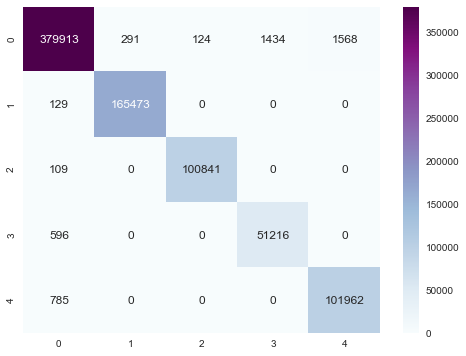

In [40]:
cm = confusion_matrix(y_test, shortChest_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu );

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


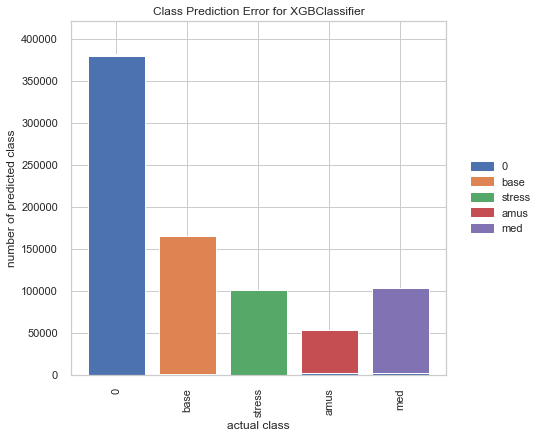

In [41]:
sns.set(style="whitegrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(shortChest, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [42]:
def multiclass_roc_auc_score(y_test, shortChest_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(shortChest_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, shortChest_pred)

print('All Chest less EMG')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))  

All Chest less EMG
-------------------
AUC: 99.61%


#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [43]:
Q1 = ch_short.quantile(0.25)
Q3 = ch_short.quantile(0.75)
IQR = Q3 - Q1

In [44]:
ch_short_out = ch_short[~((ch_short < (ch_short - 1.5 * IQR)) |(ch_short > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ch_short_out.shape)

(3642765, 8)


In [45]:
#mean normalization 
norm_ch_short_out=(ch_short_out-ch_short_out.mean())/ch_short_out.std()
norm_y = ch_short_out.w_label #keep original labels Dont normalize labels
norm_x = norm_ch_short_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [46]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_ax      8.163902e-200
c_ay       0.000000e+00
c_az       0.000000e+00
c_eda      0.000000e+00
c_temp     0.000000e+00
c_resp    6.161488e-123
c_ecg     4.305927e-166
dtype: float64

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9091    0.8421    0.8743   1727343
         1.0     0.9706    0.9287    0.9492    777666
         2.0     0.9409    0.9682    0.9544    434299
         3.0     0.7179    0.9051    0.8007    246834
         4.0     0.7436    0.8805    0.8063    456623

    accuracy                         0.8847   3642765
   macro avg     0.8564    0.9049    0.8770   3642765
weighted avg     0.8923    0.8847    0.8863   3642765



#### QDA + Normalization + Cross Validation = 10

In [48]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8795    0.7916    0.8332   1727343
         1.0     0.9884    0.8820    0.9322    777666
         2.0     0.9669    0.9508    0.9588    434299
         3.0     0.8553    0.9278    0.8900    246834
         4.0     0.5677    0.8692    0.6868    456623

    accuracy                         0.8489   3642765
   macro avg     0.8515    0.8843    0.8602   3642765
weighted avg     0.8724    0.8489    0.8548   3642765



### Model ACC TEMP EDA

#### XGBoost

In [49]:
less_Emg_Ecg = c_loc[['c_eda', 'c_temp', 'c_ax', 'c_ay', 'c_az', 'w_label']]
y = less_Emg_Ecg.w_label
x = less_Emg_Ecg.drop('w_label',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
evalSet = [(x_train, y_train), (x_test, y_test)] 

print(x_train.shape)
print(y_test.shape)

(3217760, 5)
(804441,)


In [50]:
accEdaTemp = XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, early_stopping_rounds = 20, alpha = 10, n_estimators = 300, gradient_based = 0.1, gamma=3, verbosity = 2)  

model_accEdaTemp = accEdaTemp.fit(x_train,y_train,
                                 eval_metric='merror',
                                 eval_set = evalSet)

C:\Users\kssin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[01:12:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gradient_based" } are not used.

[01:12:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 330 extra nodes, 36 pruned nodes, max_depth=10
[01:12:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 60 pruned nodes, max_depth=10
[01:12:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 12 pruned nodes, max_depth=8
[01:12:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgbo

[01:13:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 14 pruned nodes, max_depth=10
[6]	validation_0-merror:0.09911	validation_1-merror:0.09931
[01:13:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 50 pruned nodes, max_depth=10
[01:13:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 48 pruned nodes, max_depth=10
[01:13:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 12 pruned nodes, max_depth=9
[01:13:08] INFO: C:/buildkite-agen

[01:13:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 36 pruned nodes, max_depth=10
[13]	validation_0-merror:0.08217	validation_1-merror:0.08241
[01:13:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 178 extra nodes, 84 pruned nodes, max_depth=10
[01:13:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 38 pruned nodes, max_depth=9
[01:13:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 16 pruned nodes, max_depth=9
[01:13:43] INFO: C:/buildkite-agen

[01:14:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 28 pruned nodes, max_depth=10
[20]	validation_0-merror:0.06500	validation_1-merror:0.06544
[01:14:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 162 extra nodes, 88 pruned nodes, max_depth=10
[01:14:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 36 pruned nodes, max_depth=9
[01:14:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 20 pruned nodes, max_depth=9
[01:14:18] INFO: C:/buildkite-agen

[01:14:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 44 pruned nodes, max_depth=10
[27]	validation_0-merror:0.05857	validation_1-merror:0.05901
[01:15:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 96 pruned nodes, max_depth=10
[01:15:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 60 pruned nodes, max_depth=8
[01:15:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 42 pruned nodes, max_depth=7
[01:15:02] INFO: C:/buildkite-agent/

[01:15:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 42 pruned nodes, max_depth=10
[34]	validation_0-merror:0.05425	validation_1-merror:0.05456
[01:15:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 104 pruned nodes, max_depth=10
[01:15:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 6 pruned nodes, max_depth=7
[01:15:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 18 pruned nodes, max_depth=8
[01:15:37] INFO: C:/buildkite-agent/

[01:16:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 44 pruned nodes, max_depth=10
[41]	validation_0-merror:0.04860	validation_1-merror:0.04898
[01:16:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 128 pruned nodes, max_depth=9
[01:16:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 82 extra nodes, 94 pruned nodes, max_depth=9
[01:16:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 36 pruned nodes, max_depth=8
[01:16:12] INFO: C:/buildkite-agent

[01:16:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 38 pruned nodes, max_depth=7
[48]	validation_0-merror:0.04585	validation_1-merror:0.04618
[01:16:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 124 extra nodes, 90 pruned nodes, max_depth=10
[01:16:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 56 pruned nodes, max_depth=7
[01:16:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 26 pruned nodes, max_depth=6
[01:16:47] INFO: C:/buildkite-agent/b

[01:17:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 34 pruned nodes, max_depth=8
[55]	validation_0-merror:0.04411	validation_1-merror:0.04442
[01:17:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 100 pruned nodes, max_depth=10
[01:17:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 92 pruned nodes, max_depth=10
[01:17:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 22 pruned nodes, max_depth=7
[01:17:23] INFO: C:/buildkite-agent

[01:17:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 34 pruned nodes, max_depth=10
[62]	validation_0-merror:0.04222	validation_1-merror:0.04265
[01:17:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 150 pruned nodes, max_depth=8
[01:17:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 58 pruned nodes, max_depth=6
[01:17:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 36 pruned nodes, max_depth=6
[01:17:58] INFO: C:/buildkite-agent/b

[01:18:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 34 pruned nodes, max_depth=10
[69]	validation_0-merror:0.04067	validation_1-merror:0.04115
[01:18:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 158 pruned nodes, max_depth=10
[01:18:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 18 pruned nodes, max_depth=6
[01:18:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 40 pruned nodes, max_depth=9
[01:18:32] INFO: C:/buildkite-agent/

[01:19:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 84 pruned nodes, max_depth=7
[76]	validation_0-merror:0.03825	validation_1-merror:0.03867
[01:19:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 194 extra nodes, 110 pruned nodes, max_depth=10
[01:19:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 50 extra nodes, 58 pruned nodes, max_depth=7
[01:19:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 52 pruned nodes, max_depth=8
[01:19:09] INFO: C:/buildkite-agent/

[01:19:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 80 pruned nodes, max_depth=8
[83]	validation_0-merror:0.03584	validation_1-merror:0.03618
[01:19:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 162 pruned nodes, max_depth=8
[01:19:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 28 pruned nodes, max_depth=9
[01:19:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 44 pruned nodes, max_depth=9
[01:19:45] INFO: C:/buildkite-agent/bu

[01:20:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 36 pruned nodes, max_depth=10
[90]	validation_0-merror:0.03412	validation_1-merror:0.03444
[01:20:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 184 pruned nodes, max_depth=8
[01:20:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 28 pruned nodes, max_depth=7
[01:20:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 70 pruned nodes, max_depth=6
[01:20:20] INFO: C:/buildkite-agent/b

[01:20:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 48 pruned nodes, max_depth=10
[97]	validation_0-merror:0.03242	validation_1-merror:0.03267
[01:20:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 190 pruned nodes, max_depth=7
[01:20:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 54 pruned nodes, max_depth=8
[01:20:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 54 pruned nodes, max_depth=8
[01:20:55] INFO: C:/buildkite-agent/b

[01:21:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 66 pruned nodes, max_depth=7
[104]	validation_0-merror:0.03115	validation_1-merror:0.03139
[01:21:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 60 pruned nodes, max_depth=10
[01:21:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 24 pruned nodes, max_depth=9
[01:21:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 34 pruned nodes, max_depth=6
[01:21:31] INFO: C:/buildkite-agent/b

[01:22:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 118 pruned nodes, max_depth=7
[111]	validation_0-merror:0.03017	validation_1-merror:0.03044
[01:22:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 128 pruned nodes, max_depth=7
[01:22:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 64 pruned nodes, max_depth=7
[01:22:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 68 pruned nodes, max_depth=6
[01:22:06] INFO: C:/buildkite-agent/

[01:22:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 96 pruned nodes, max_depth=7
[118]	validation_0-merror:0.02919	validation_1-merror:0.02942
[01:22:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 148 pruned nodes, max_depth=7
[01:22:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 56 pruned nodes, max_depth=6
[01:22:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 52 pruned nodes, max_depth=7
[01:22:41] INFO: C:/buildkite-agent/b

[01:23:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 36 pruned nodes, max_depth=8
[125]	validation_0-merror:0.02828	validation_1-merror:0.02858
[01:23:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 148 pruned nodes, max_depth=7
[01:23:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 72 pruned nodes, max_depth=5
[01:23:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 72 pruned nodes, max_depth=5
[01:23:26] INFO: C:/buildkite-agent/b

[01:23:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 64 pruned nodes, max_depth=10
[132]	validation_0-merror:0.02771	validation_1-merror:0.02806
[01:23:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 106 pruned nodes, max_depth=10
[01:23:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 26 pruned nodes, max_depth=5
[01:24:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 44 pruned nodes, max_depth=5
[01:24:01] INFO: C:/buildkite-agen

[01:24:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 44 pruned nodes, max_depth=8
[139]	validation_0-merror:0.02710	validation_1-merror:0.02736
[01:24:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 204 pruned nodes, max_depth=9
[01:24:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 86 pruned nodes, max_depth=7
[01:24:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 42 pruned nodes, max_depth=7
[01:24:36] INFO: C:/buildkite-agent/b

[01:25:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 46 pruned nodes, max_depth=10
[146]	validation_0-merror:0.02641	validation_1-merror:0.02668
[01:25:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 216 pruned nodes, max_depth=7
[01:25:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 46 pruned nodes, max_depth=7
[01:25:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 22 pruned nodes, max_depth=7
[01:25:11] INFO: C:/buildkite-agent/

[01:25:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 38 pruned nodes, max_depth=9
[153]	validation_0-merror:0.02566	validation_1-merror:0.02588
[01:25:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 76 pruned nodes, max_depth=10
[01:25:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 68 pruned nodes, max_depth=7
[01:25:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 30 pruned nodes, max_depth=9
[01:25:45] INFO: C:/buildkite-agent/b

[01:26:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 106 pruned nodes, max_depth=5
[160]	validation_0-merror:0.02497	validation_1-merror:0.02518
[01:26:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 104 pruned nodes, max_depth=10
[01:26:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 16 pruned nodes, max_depth=6
[01:26:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 34 pruned nodes, max_depth=5
[01:26:20] INFO: C:/buildkite-agen

[01:26:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 74 extra nodes, 84 pruned nodes, max_depth=10
[167]	validation_0-merror:0.02441	validation_1-merror:0.02461
[01:26:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 80 pruned nodes, max_depth=10
[01:26:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 12 pruned nodes, max_depth=5
[01:26:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 36 pruned nodes, max_depth=8
[01:26:56] INFO: C:/buildkite-agent/

[01:27:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 34 pruned nodes, max_depth=8
[174]	validation_0-merror:0.02400	validation_1-merror:0.02417
[01:27:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 94 pruned nodes, max_depth=10
[01:27:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 62 pruned nodes, max_depth=5
[01:27:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 44 pruned nodes, max_depth=10
[01:27:31] INFO: C:/buildkite-agent

[01:28:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 110 pruned nodes, max_depth=8
[181]	validation_0-merror:0.02358	validation_1-merror:0.02374
[01:28:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 218 pruned nodes, max_depth=9
[01:28:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 58 pruned nodes, max_depth=6
[01:28:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 44 pruned nodes, max_depth=10
[01:28:06] INFO: C:/buildkite-agent

[01:28:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 102 pruned nodes, max_depth=8
[188]	validation_0-merror:0.02332	validation_1-merror:0.02347
[01:28:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 160 pruned nodes, max_depth=8
[01:28:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 26 pruned nodes, max_depth=9
[01:28:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 64 pruned nodes, max_depth=6
[01:28:41] INFO: C:/buildkite-agent/

[01:29:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 144 pruned nodes, max_depth=8
[195]	validation_0-merror:0.02299	validation_1-merror:0.02316
[01:29:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 256 pruned nodes, max_depth=7
[01:29:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 66 pruned nodes, max_depth=5
[01:29:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 34 pruned nodes, max_depth=9
[01:29:16] INFO: C:/buildkite-agent/

[01:29:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 94 pruned nodes, max_depth=9
[202]	validation_0-merror:0.02267	validation_1-merror:0.02284
[01:29:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 246 pruned nodes, max_depth=7
[01:29:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 68 pruned nodes, max_depth=6
[01:29:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 46 pruned nodes, max_depth=5
[01:29:51] INFO: C:/buildkite-agent/b

[01:30:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 138 pruned nodes, max_depth=5
[209]	validation_0-merror:0.02247	validation_1-merror:0.02265
[01:30:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 226 pruned nodes, max_depth=8
[01:30:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 58 pruned nodes, max_depth=7
[01:30:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 48 pruned nodes, max_depth=5
[01:30:27] INFO: C:/buildkite-agent/

[01:30:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 32 pruned nodes, max_depth=9
[216]	validation_0-merror:0.02220	validation_1-merror:0.02237
[01:31:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 166 pruned nodes, max_depth=7
[01:31:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 28 pruned nodes, max_depth=8
[01:31:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 70 pruned nodes, max_depth=5
[01:31:03] INFO: C:/buildkite-agent/b

[01:31:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 126 pruned nodes, max_depth=7
[223]	validation_0-merror:0.02189	validation_1-merror:0.02203
[01:31:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 236 pruned nodes, max_depth=7
[01:31:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 66 pruned nodes, max_depth=5
[01:31:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 40 pruned nodes, max_depth=8
[01:31:38] INFO: C:/buildkite-agent/

[01:32:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 32 pruned nodes, max_depth=6
[230]	validation_0-merror:0.02170	validation_1-merror:0.02186
[01:32:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 56 extra nodes, 72 pruned nodes, max_depth=10
[01:32:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 26 pruned nodes, max_depth=8
[01:32:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 46 pruned nodes, max_depth=8
[01:32:14] INFO: C:/buildkite-agent/b

[01:32:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 128 pruned nodes, max_depth=6
[237]	validation_0-merror:0.02150	validation_1-merror:0.02165
[01:32:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 108 pruned nodes, max_depth=10
[01:32:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 60 pruned nodes, max_depth=5
[01:32:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 40 pruned nodes, max_depth=5
[01:32:49] INFO: C:/buildkite-agent

[01:33:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 116 pruned nodes, max_depth=7
[244]	validation_0-merror:0.02126	validation_1-merror:0.02142
[01:33:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 70 pruned nodes, max_depth=10
[01:33:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 30 pruned nodes, max_depth=4
[01:33:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 54 pruned nodes, max_depth=5
[01:33:25] INFO: C:/buildkite-agent/

[01:33:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 34 extra nodes, 34 pruned nodes, max_depth=6
[251]	validation_0-merror:0.02109	validation_1-merror:0.02121
[01:33:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 266 pruned nodes, max_depth=6
[01:33:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 74 pruned nodes, max_depth=6
[01:34:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 62 pruned nodes, max_depth=5
[01:34:00] INFO: C:/buildkite-agent/b

[01:34:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 134 pruned nodes, max_depth=7
[258]	validation_0-merror:0.02092	validation_1-merror:0.02103
[01:34:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 82 pruned nodes, max_depth=10
[01:34:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 70 pruned nodes, max_depth=4
[01:34:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 30 pruned nodes, max_depth=5
[01:34:36] INFO: C:/buildkite-agent/

[01:35:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 122 pruned nodes, max_depth=6
[265]	validation_0-merror:0.02075	validation_1-merror:0.02084
[01:35:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 80 pruned nodes, max_depth=10
[01:35:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 58 pruned nodes, max_depth=6
[01:35:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 20 extra nodes, 44 pruned nodes, max_depth=5
[01:35:11] INFO: C:/buildkite-agent/

[01:35:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 148 pruned nodes, max_depth=6
[272]	validation_0-merror:0.02057	validation_1-merror:0.02070
[01:35:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 264 pruned nodes, max_depth=6
[01:35:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 12 extra nodes, 36 pruned nodes, max_depth=5
[01:35:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 34 pruned nodes, max_depth=5
[01:35:46] INFO: C:/buildkite-agent/

[01:36:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 106 pruned nodes, max_depth=5
[279]	validation_0-merror:0.02041	validation_1-merror:0.02055
[01:36:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 84 extra nodes, 110 pruned nodes, max_depth=10
[01:36:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 18 extra nodes, 28 pruned nodes, max_depth=5
[01:36:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 56 pruned nodes, max_depth=4
[01:36:24] INFO: C:/buildkite-agent/

[01:36:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 140 pruned nodes, max_depth=7
[286]	validation_0-merror:0.02025	validation_1-merror:0.02042
[01:36:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 90 pruned nodes, max_depth=9
[01:37:00] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 38 pruned nodes, max_depth=3
[01:37:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 48 pruned nodes, max_depth=6
[01:37:02] INFO: C:/buildkite-agent/bu

[01:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 144 pruned nodes, max_depth=7
[293]	validation_0-merror:0.02014	validation_1-merror:0.02032
[01:37:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 272 pruned nodes, max_depth=5
[01:37:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 16 extra nodes, 64 pruned nodes, max_depth=4
[01:37:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 10 extra nodes, 40 pruned nodes, max_depth=5
[01:37:43] INFO: C:/buildkite-agent/

In [51]:
accEdaTemp_pred = accEdaTemp.predict(x_test)
accEdaTemp_report = (classification_report(y_test, 
                                         accEdaTemp_pred, 
                                         labels = np.unique(accEdaTemp_pred),
                                         digits = 4))

print('Balanced Accuracy:', balanced_accuracy_score(y_test, accEdaTemp_pred))
print('---------------------------------------')
print('------------ACC EDA TEMP Classification Report------------')
print(accEdaTemp_report)

Balanced Accuracy: 0.9798057197857191
---------------------------------------
------------ACC EDA TEMP Classification Report------------
              precision    recall  f1-score   support

           0     0.9852    0.9723    0.9787    383070
           1     0.9963    0.9973    0.9968    165869
           2     0.9889    0.9963    0.9926    101519
           3     0.9351    0.9609    0.9478     51965
           4     0.9478    0.9722    0.9598    102018

    accuracy                         0.9797    804441
   macro avg     0.9706    0.9798    0.9751    804441
weighted avg     0.9800    0.9797    0.9798    804441



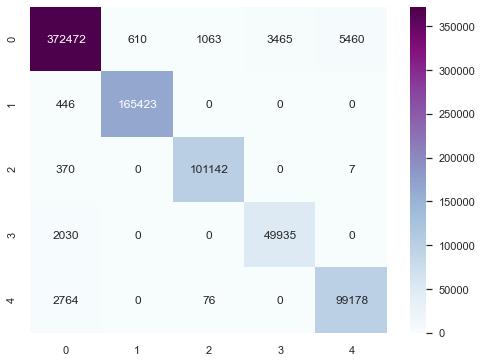

In [52]:
cm = confusion_matrix(y_test, accEdaTemp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu);

C:\Users\kssin\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


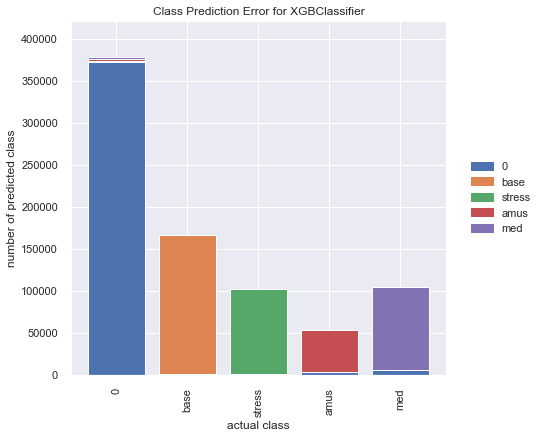

In [53]:
sns.set(style="darkgrid")
Classes = ['0', 'base', 'stress', 'amus', 'med']
error = ClassPredictionError(accEdaTemp, size=(620, 450), classes=Classes)
error.score(x_test, y_test)
e = error.poof()

In [54]:
def multiclass_roc_auc_score(y_test, accEdaTemp_pred, average = 'macro'): #(None, 'micro', 'macro', 'weighted', 'samples')
    xg = preprocessing.LabelBinarizer()
    xg.fit(y_test)
    y_test1 = xg.transform(y_test) 
    y_pred1 = xg.transform(accEdaTemp_pred)
    return roc_auc_score(y_test1, y_pred1, average=average)

aucScore = multiclass_roc_auc_score(y_test, accEdaTemp_pred)

print('ACC EDA TEMP')
print('-------------------')
print("AUC: %.2f%%" % (aucScore*100))

ACC EDA TEMP
-------------------
AUC: 98.71%


In [55]:
Q1 = less_Emg_Ecg.quantile(0.25)
Q3 = less_Emg_Ecg.quantile(0.75)
IQR = Q3 - Q1

In [56]:
less_Emg_Ecg_out = less_Emg_Ecg[~((less_Emg_Ecg < (less_Emg_Ecg - 1.5 * IQR)) |(less_Emg_Ecg > (Q3 + 1.5 * IQR))).any(axis=1)]
print(less_Emg_Ecg_out.shape)

(4017073, 6)


In [57]:
norm_less_Emg_Ecg_out=(less_Emg_Ecg_out-less_Emg_Ecg_out.mean())/less_Emg_Ecg_out.std()
norm_y = less_Emg_Ecg_out.w_label #keep original labels Dont normalize labels
norm_x = norm_less_Emg_Ecg_out.drop('w_label',axis=1)

norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [58]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const      0.000000e+00
c_eda      0.000000e+00
c_temp     0.000000e+00
c_ax      1.015183e-271
c_ay       0.000000e+00
c_az       0.000000e+00
dtype: float64

#### KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9072    0.8434    0.8742   1912992
         1.0     0.9712    0.9443    0.9576    826287
         2.0     0.9519    0.9688    0.9603    506082
         3.0     0.7814    0.8621    0.8198    260025
         4.0     0.7011    0.8678    0.7756    511687

    accuracy                         0.8843   4017073
   macro avg     0.8626    0.8973    0.8775   4017073
weighted avg     0.8916    0.8843    0.8861   4017073



#### QDA + Normalization + Cross Validation = 10

In [60]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8827    0.7815    0.8290   1912992
         1.0     0.9885    0.8788    0.9304    826287
         2.0     0.9672    0.9432    0.9551    506082
         3.0     0.8513    0.9337    0.8906    260025
         4.0     0.5612    0.8886    0.6879    511687

    accuracy                         0.8454   4017073
   macro avg     0.8502    0.8852    0.8586   4017073
weighted avg     0.8721    0.8454    0.8518   4017073

